In [1]:
import os
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models, layers, Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# Load data
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
# X, y split + X Scaling(divide by 255 -> [0, 1] Scaling)
X_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype(float) / 255
y_train = to_categorical(df_train['label'].values, num_classes=10)
df_test = df_test.values.reshape(-1, 28, 28, 1).astype(float) / 255

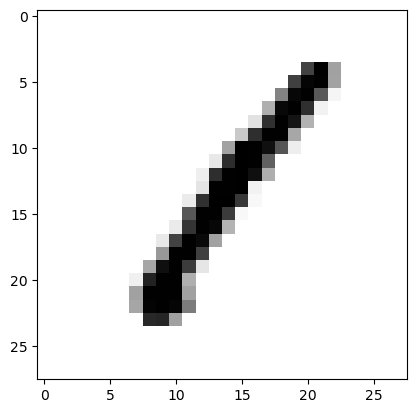

In [4]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [5]:
# Train-Valid split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [15]:
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    
    Conv2D(64, 2, activation='relu', padding='same'),
    BatchNormalization(),
    
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, 2, activation='relu', padding='same'),
    BatchNormalization(),
    
    Conv2D(128, 2, padding='same', activation='relu'),
    BatchNormalization(),
    
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        8256      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(X_tr, y_tr, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20


2023-08-31 09:06:36.270108: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


58/58 [==============================] - 7s 48ms/step - loss: 0.9457 - accuracy: 0.7521 - val_loss: 2.9736 - val_accuracy: 0.1448
Epoch 2/20
58/58 [==============================] - 2s 42ms/step - loss: 0.1268 - accuracy: 0.9632 - val_loss: 3.7775 - val_accuracy: 0.1934
Epoch 3/20
58/58 [==============================] - 2s 43ms/step - loss: 0.0757 - accuracy: 0.9782 - val_loss: 3.7779 - val_accuracy: 0.2909
Epoch 4/20
58/58 [==============================] - 3s 44ms/step - loss: 0.0599 - accuracy: 0.9826 - val_loss: 2.4488 - val_accuracy: 0.3098
Epoch 5/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 1.4972 - val_accuracy: 0.4187
Epoch 6/20
58/58 [==============================] - 3s 43ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.6986 - val_accuracy: 0.7746
Epoch 7/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.3502 - val_accuracy: 0.8950
Epoch 8/20
58/58 [======

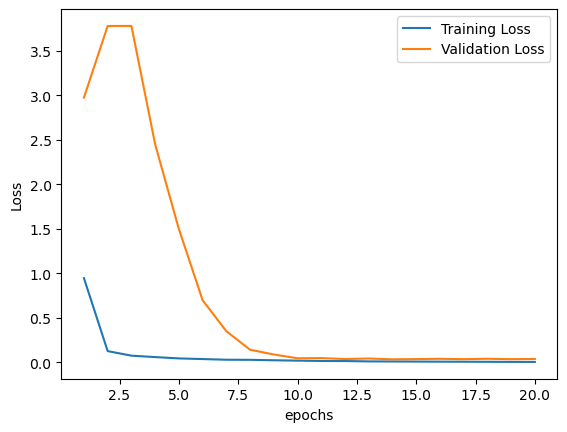

In [18]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

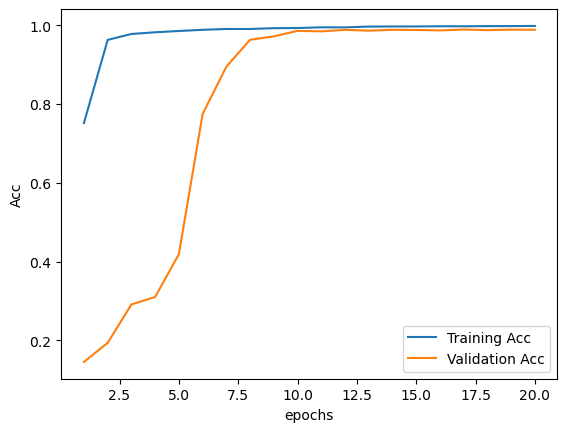

In [19]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.xlabel("epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [10]:
preds = model.predict(df_test)

875/875 [==============================] - 2s 2ms/step


In [24]:
final_predictions = [np.argmax(x) for x in preds]

In [20]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
submission['Label'] = final_predictions
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [26]:
submission.to_csv('/kaggle/working/submission.csv', index=False)